# Kaggle Competition Report: Shweta Shambhavi

In [0]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score as AUC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas_profiling
from sklearn.metrics import roc_auc_score
from google.colab import files
import xgboost as xgb
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
from xgboost import XGBRegressor
from skopt import BayesSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve, GridSearchCV
%matplotlib inline

In [0]:
train = pd.read_csv("train_final.csv")
test = pd.read_csv("test_final.csv")

In [0]:
train.describe()

In [0]:
y = train.Y
X = train.loc[:, 'Id':'f24']


In [0]:
X = X.drop(['Y'], axis=1)

In [10]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1) # split the data 
train_X.shape

(12287, 25)

In [0]:
pd.isnull(X).values.any()

False

In [0]:
X.describe

In [0]:
train_X.describe

# Data Exploration

Pandas Profiling: Following this kaggle post
https://www.kaggle.com/udayreddie/multiple-linear-regression-with-eda

In [13]:
profile_report = pandas_profiling.ProfileReport(train)
profile_report

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,26
Number of observations,16383
Total Missing (%),0.0%
Total size in memory,3.2 MiB
Average record size in memory,208.0 B
Numeric,25
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [0]:
profile_report.to_file("pandas_profiling.html")

In [0]:
profile_report = pandas_profiling.ProfileReport(test)
profile_report.to_file("pandas_profiling.html")

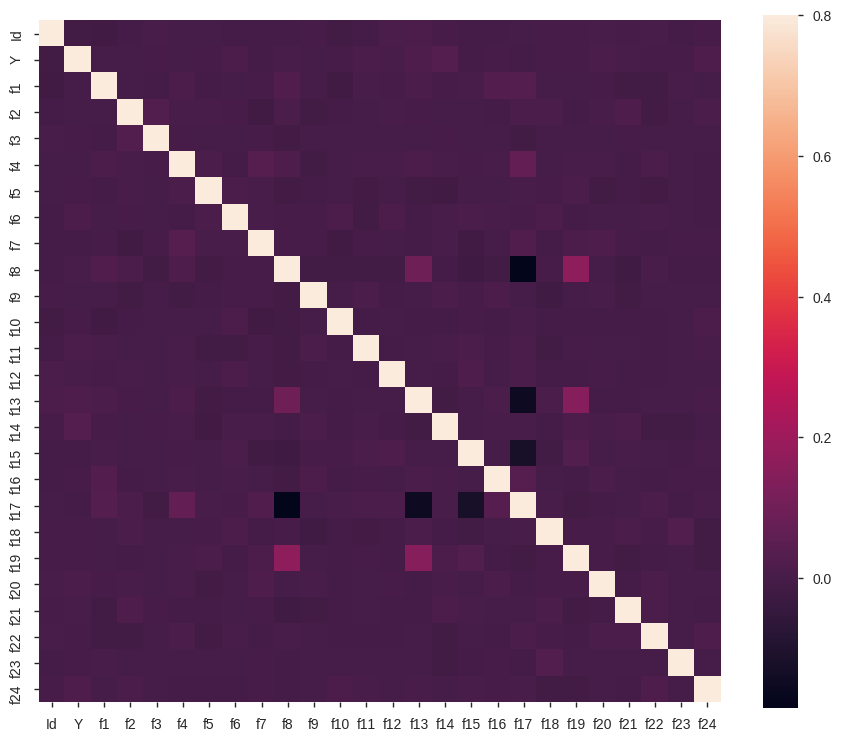

In [15]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [0]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Y')['Y'].index
cm = np.corrcoef(X[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


In [0]:
X.head(5)
X.shape

(16383, 24)

# Decision Tree

In [0]:
decision_model = DecisionTreeRegressor(max_depth=4 , random_state=1)

In [0]:
# Fit Model
decision_model.fit(X, y)

In [0]:
# Make validation predictions and calculate AUC
decision_model.fit(train_X, train_y)
val_predictions = decision_model.predict(val_X)
val_AUC = roc_auc_score(val_y, val_predictions)
val_AUC
#fpr, tpr, thresholds = metrics.roc_curve(val_y, val_predictions, pos_label=2)
#metrics.auc(fpr, tpr)


0.7994972525661691

In [0]:
test_predictions = decision_model.predict(test)

In [0]:
resultWithDecision = pd.DataFrame({"Id": test["Id"], 'Y':test_predictions})
filename = 'result_using_decision_tree.csv'
resultWithDecision.to_csv(filename, index=False)

# Functions


In [0]:
def createFile(filename,predictedValue):
  resultWithDecision = pd.DataFrame({"Id": test["Id"], 'Y':predictedValue})
  resultWithDecision.to_csv(filename, index=False)
  files.download(filename)

In [0]:
def predictOnTest(model: xgb.XGBClassifier,file_name):
  model.fit(X,y)
  predicted_value = model.predict(test)
  createFile(filename=file_name,predictedValue=predicted_value)


In [0]:
def createParam():
  paramDict = {}
  for index,i in enumerate(paramKey):
    paramDict[i] = paramValue[index]
  return paramDict

In [0]:
def createXGBRegressorModel(params):
  model_XGBoost = xgb.XGBRegressor(colsample_bylevel=params['colsample_bylevel'],
                                   colsample_bytree=params['colsample_bytree'],
                                   learning_rate=params['learning_rate'],
                                   max_delta_step=params['max_delta_step'],
                                   max_depth=params['max_depth'],
                                   min_child_weight=params['min_child_weight'],
                                   n_estimators=params['n_estimators'])
  return model_XGBoost

In [0]:
def createXGBRegressorModelwithMoreParameters(params):
  model_XGBoost = xgb.XGBRegressor(colsample_bylevel=params['colsample_bylevel'],
                                   colsample_bytree=params['colsample_bytree'],
                                   gamma=params['gamma'],
                                   learning_rate=params['learning_rate'],
                                   max_delta_step=params['max_delta_step'],
                                   max_depth=params['max_depth'],min_child_weight=params['min_child_weight'],
                                   n_estimators=params['n_estimators'],
                                   subsample=param_dict['subsample'], scale_pos_weight=param_dict['scale_pos_weight'],
                                   reg_alpha=param_dict['reg_alpha'],
                                   reg_lambda=param_dict['reg_lambda'])
  return model_XGBoost

# Random Forest

In [0]:
# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state=42, max_depth=3, min_samples_leaf=70)


In [0]:
# fit your model
rf_model.fit(train_X,train_y)
predicted_value = rf_model.predict(val_X)
val_AUC = roc_auc_score(val_y, predicted_value)
val_AUC

0.8103803263364152

In [0]:
rf_model.fit(X,y)
predicted_value = rf_model.predict(test)

In [0]:
createFile(filename="using_random_forest.csv",predictedValue=predicted_value)

# XGBoost



In [4]:
pip install scikit-optimize

     |████████████████████████████████| 81kB 2.2MB/s 


# simple xgboost


In [0]:
model_XGBoost = xgb.XGBRegressor(max_depth=2, n_estimators= 550, min_child_weight=2, learning_rate=0.05)

In [0]:
model_XGBoost.fit(train_X,train_y)
predicted_value = model_XGBoost.predict(val_X)
val_AUC = roc_auc_score(val_y, predicted_value)
val_AUC


In [0]:
model_XGBoost.fit(X,y)
predicted_value = model_XGBoost.predict(test)
createFile(filename="using_XGBoost.csv",predictedValue=predicted_value)

# XGBoost tuning using BayesSearch


In [0]:
opt = BayesSearchCV(
    XGBClassifier(n_jobs=4),
    {
        'learning_rate': (0.005, 0.01,'log-uniform'),
        'n_estimators': (300, 900),
        'colsample_bytree': (0.01, 1.0,'log-uniform'),
        'colsample_bylevel': (0.2, 1.0, 'uniform'),
        'gamma': [0.5,1,1.5,2],
        'min_child_weight': (1, 10),
        'max_depth': [3,5,8,10,15,20,500,100],
        'max_delta_step': (1, 50)
    },
    cv = StratifiedKFold(
        n_splits=3,
        shuffle=True,
        random_state=42
    ),
    n_iter=8, # may want to have more iterations here... :)
    verbose=0
)

#(cmd+k ; cmd+c)
        # 'learning_rate': (0.001, 0.01,'log-uniform'),
        # 'n_estimators': (100, 300),
        # 'colsample_bytree': (0.35, 0.4,'log-uniform'),
        # 'colsample_bylevel': (0.9, 1.0, 'uniform'),
        # 'gamma': [0.5,1,1.5,2],
        # 'min_child_weight': (1, 7),
        # 'max_depth': [3,5,8,10,15,20,50,100],
        # 'max_delta_step': (30, 50)

In [0]:
opt.fit(X, y)

BayesSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
              error_score='raise',
              estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                      colsample_bylevel=1, colsample_bynode=1,
                                      colsample_bytree=1, gamma=0,
                                      learning_rate=0.1, max_delta_step=0,
                                      max_depth=3, min_child_weight=1,
                                      missing=None, n_estimators=100, n_jobs=4,
                                      nthread=None, objective='binar...
              optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=None,
              refit=True, return_train_score=False, scoring=None,
              search_spaces={'colsample_bylevel': (0.2, 1.0, 'uniform'),
                             'colsample_bytree': (0.01, 1.0, 'log-uniform'),
                             'gamma': [0.5, 1, 1.5, 2],
                   

In [0]:
opt.best_score_, opt.best_params_

(0.9586554895417921,
 OrderedDict([('colsample_bylevel', 0.7026447392525483),
              ('colsample_bytree', 0.6394454110082819),
              ('gamma', 1.5),
              ('learning_rate', 0.007425083091020031),
              ('max_delta_step', 39),
              ('max_depth', 8),
              ('min_child_weight', 2),
              ('n_estimators', 472)]))

In [0]:
paramKey = list(opt.best_params_.keys())
paramValue = list(opt.best_params_.values())
print(paramKey, paramValue)

['colsample_bylevel', 'colsample_bytree', 'gamma', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'n_estimators'] [0.7026447392525483, 0.6394454110082819, 1.5, 0.007425083091020031, 39, 8, 2, 472]


In [0]:
param_dict = createParam()
print(param_dict)

{'colsample_bylevel': 0.7026447392525483, 'colsample_bytree': 0.6394454110082819, 'gamma': 1.5, 'learning_rate': 0.007425083091020031, 'max_delta_step': 39, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 472}


In [0]:
model_XGBoost = createXGBRegressorModel(params=param_dict)
model_XGBoost

XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.7026447392525483, colsample_bynode=1,
             colsample_bytree=0.6394454110082819, gamma=1.5,
             importance_type='gain', learning_rate=0.007425083091020031,
             max_delta_step=39, max_depth=8, min_child_weight=2, missing=None,
             n_estimators=472, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [0]:
model_XGBoost.fit(train_X,train_y)
predicted_value = model_XGBoost.predict(val_X)
val_AUC = roc_auc_score(val_y, predicted_value)
val_AUC

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:49:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8559110274863228

In [0]:
predictOnTest(model=model_XGBoost,file_name="usingXGBoost.csv")

In [0]:
#model_XGBoost = xgb.XGBRegressor(colsample_bylevel=0.9776723332487997, colsample_bytree=0.20399494327887527, gamma=1.3316532012042214e-05,
# learning_rate=0.051  ,max_depth=8, n_estimators= 560, min_child_weight=2)

# Different XGBboost tuning


In [0]:
model_XGBoost = xgb.XGBRegressor(colsample_bylevel=1.0, gamma=0.000110, colsample_bytree=0.36598,
                                 learning_rate=0.00999, max_depth=50, n_estimators= 300, min_child_weight=1)


In [0]:
model_XGBoost.fit(train_X,train_y)
predicted_value = model_XGBoost.predict(val_X)
val_AUC = roc_auc_score(val_y, predicted_value)
val_AUC

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:09:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.870623131175734

In [0]:
predictOnTest(model=model_XGBoost,file_name="using_tuned_XGBoost.csv")

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[16:22:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Kaggle: .89
{colsample_bytree=0.095, gamma=0.0052, learning_rate=0.06099  ,max_depth=8, n_estimators= 630, min_child_weight=3}


In [0]:
model_XGBoost = xgb.XGBRegressor(colsample_bytree=0.095, gamma=0.0052,
                                 learning_rate=0.06099  ,max_depth=8, n_estimators= 630, min_child_weight=3)

In [0]:
model_XGBoost.fit(train_X,train_y)
predicted_value = model_XGBoost.predict(val_X)
val_AUC = roc_auc_score(val_y, predicted_value)
val_AUC

# .86; in competition: .88449



In [0]:
model_XGBoost = xgb.XGBRegressor(colsample_bylevel=0.9776723332487997,
                                 colsample_bytree=0.20399494327887527,
                                 gamma=1.3316532012042214e-05, learning_rate=0.051, 
                                 max_depth=8, n_estimators= 560, min_child_weight=2)

In [0]:
model_XGBoost.fit(train_X,train_y)
predicted_value = model_XGBoost.predict(val_X)
val_AUC = roc_auc_score(val_y, predicted_value)
val_AUC

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:35:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8648034850763708

# model: .87 incompetition : .883


In [0]:
model_XGBoost = xgb.XGBRegressor(colsample_bylevel=0.8,
                                 colsample_bytree=0.097,
                                 gamma=1.94e-05,
                                 learning_rate=0.05095,
                                 max_depth=8,
                                 n_estimators= 609,
                                 min_child_weight=2)

In [0]:
model_XGBoost.fit(train_X,train_y)
predicted_value = model_XGBoost.predict(val_X)
val_AUC = roc_auc_score(val_y, predicted_value)
val_AUC

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[05:13:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8706914425076251

In [0]:
model_XGBoost.fit(X,y)
predicted_value = model_XGBoost.predict(test)
createFile(filename="using_XGBoost_tuned.csv",predictedValue=predicted_value)

# BayesSearchCV
 Followed this kaggle post: https://www.kaggle.com/nanomathias/bayesian-optimization-of-xgboost-lb-0-9769

In [0]:
from sklearn.model_selection import StratifiedKFold
ITERATIONS = 20

# Classifier
bayes_cv_tuner = BayesSearchCV(
    estimator = xgb.XGBClassifier(
        n_jobs = 1,
        eval_metric = 'auc',
        silent=1,
        objective = 'binary:logistic',
        tree_method='approx'
    ),
    search_spaces = {
        'learning_rate': (0.005, 0.05,'log-uniform'),
        'n_estimators': (300, 900),
        'colsample_bytree': (0.01, 1.0,'log-uniform'),
        'colsample_bylevel': (0.2, 1.0, 'uniform'),
        'min_child_weight': (1, 10),
        'max_depth': [3,5,8,10,15,20,50,100],
        'max_delta_step': (1, 50)
    },    
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=3,
        shuffle=True,
        random_state=42
    ),
    n_iter = ITERATIONS,   
    verbose = 0,
    refit = True,
    random_state = 42
)

def status_print(optim_result):
    """Status callback durring bayesian hyperparameter search"""
    
    # Get all the models tested so far in DataFrame format
    all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    
    
    # Get current parameters and the best parameters    
    best_params = pd.Series(bayes_cv_tuner.best_params_)
    print('Model #{}\nBest ROC-AUC: {}\nBest params:\n {}\n'.format(
        len(all_models),
        np.round(bayes_cv_tuner.best_score_, 4),
        bayes_cv_tuner.best_params_
    ))

In [12]:
result = bayes_cv_tuner.fit(X, y, callback=status_print)

Model #1
Best ROC-AUC: 0.8658
Best params:
 OrderedDict([('colsample_bylevel', 0.5280831670826511), ('colsample_bytree', 0.28539836866041823), ('learning_rate', 0.04283886967006358), ('max_delta_step', 16), ('max_depth', 20), ('min_child_weight', 5), ('n_estimators', 511)])

Model #2
Best ROC-AUC: 0.8658
Best params:
 OrderedDict([('colsample_bylevel', 0.5280831670826511), ('colsample_bytree', 0.28539836866041823), ('learning_rate', 0.04283886967006358), ('max_delta_step', 16), ('max_depth', 20), ('min_child_weight', 5), ('n_estimators', 511)])

Model #3
Best ROC-AUC: 0.8658
Best params:
 OrderedDict([('colsample_bylevel', 0.5280831670826511), ('colsample_bytree', 0.28539836866041823), ('learning_rate', 0.04283886967006358), ('max_delta_step', 16), ('max_depth', 20), ('min_child_weight', 5), ('n_estimators', 511)])

Model #4
Best ROC-AUC: 0.8658
Best params:
 OrderedDict([('colsample_bylevel', 0.5280831670826511), ('colsample_bytree', 0.28539836866041823), ('learning_rate', 0.042838869

In [0]:
# Model #1
# Best ROC-AUC: 0.8796
# Best params: OrderedDict([('colsample_bylevel', 0.5280831670826511), ('colsample_bytree', 0.28539836866041823),
# ('learning_rate', 0.009545336739149406), ('max_delta_step', 16), ('max_depth', 20), ('min_child_weight', 5), ('n_estimators', 511)])


In [111]:
paramKey = list(bayes_cv_tuner.best_params_.keys())
paramValue = list(bayes_cv_tuner.best_params_.values())
print(paramKey, paramValue)

param_dict = createParam()
print(param_dict)

['colsample_bylevel', 'colsample_bytree', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'n_estimators'] [0.6187758464179881, 0.16445188167591218, 0.049999999999999996, 1, 15, 1, 600]
{'colsample_bylevel': 0.6187758464179881, 'colsample_bytree': 0.16445188167591218, 'learning_rate': 0.049999999999999996, 'max_delta_step': 1, 'max_depth': 15, 'min_child_weight': 1, 'n_estimators': 600}


In [116]:
model_XGBoost = createXGBRegressorModel(param_dict)
model_XGBoost
model_XGBoost.fit(X,y)
predicted_value = predictOnTest(model= model_XGBoost, file_name="using_bayes_search.csv")

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[21:50:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:51:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [0]:
model_XGBoost

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.2,
             colsample_bynode=1, colsample_bytree=0.3629153391028137, gamma=0,
             importance_type='gain', learning_rate=0.005981990289564961,
             max_delta_step=1, max_depth=15, min_child_weight=1, missing=None,
             n_estimators=900, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

# Not Used
didn't do submissions on these

# ExtraTreeRegressor


In [0]:
model_extra_tree = ExtraTreeRegressor(max_depth=9, random_state=1)

In [0]:
train_X.describe

In [0]:
model_extra_tree.fit(train_X,train_y)
predicted_value = model_extra_tree.predict(val_X)
val_AUC = roc_auc_score(val_y, predicted_value)
val_AUC

0.7295356627098026

# Stacking : .8474 (on validation set)
With XGBoost Tuned Mode:
With Parameters:
{colsample_bylevel=1.0, gamma=0.000110, colsample_bytree=0.36598, learning_rate=0.00999, max_depth=50, n_estimators= 300, min_child_weight=1}


In [0]:
val_X_new = val_X.copy()
val_X_new['y'] = predicted_value
val_X_new.head()

In [0]:
model_XGBoost.fit(train_X,train_y)
predicted_train_value = model_XGBoost.predict(train_X)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:10:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [0]:
train_X_with_tree = train_X.copy()
train_X_with_tree['y'] = predicted_train_value
train_X_with_tree.head(5) 

In [0]:
model_XGBoost.fit(train_X_with_tree, train_y)
predicted_value = model_XGBoost.predict(val_X_new)
val_AUC = roc_auc_score(val_y, predicted_value)
val_AUC

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:11:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8474524067760049

# XGBoost using grid search
 was taking too long to run


In [0]:
param_test1 = {
        'learning_rate': (0.005, 0.01,'log-uniform'),
        'n_estimators': (300, 900),
        'colsample_bytree': (0.01, 1.0,'log-uniform'),
        'colsample_bylevel': (0.2, 1.0, 'uniform'),
        'gamma': [0.5,1,1.5,2],
        'min_child_weight': (1, 10),
        'max_depth': [3,5,8,10,15,20,500,100],
        'max_delta_step': (1, 50)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch1.fit(train_X,train_y)
gsearch1.score, gsearch1.best_params_, gsearch1.best_score_

gsearch1.fit(X,y)
predictedValue = gsearch1.predict(test)
createfile(filename="using_grid_search.csv", predictedValue=)

# AdaBoost
ROC: .80047

In [0]:
from sklearn.ensemble import AdaBoostRegressor
model_ADA = AdaBoostRegressor(rf_model,n_estimators=100, random_state=42)

model_ADA.fit(train_X,train_y)
predicted_value =(model_ADA.predict(val_X))
val_AUC = roc_auc_score(val_y, predicted_value)
val_AUC


0.8004709886567236

# Different Classification algorithm

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Logistic Regression

In [0]:
# Logistic Regression

model_logreg = LogisticRegression(l1_ratio=0.0001)
model_logreg.fit(train_X, train_y)
predicted_value = model_logreg.predict(val_X)

model_logreg.score(train_X, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


0.9403434524293969

In [0]:
val_AUC = roc_auc_score(val_y, predicted_value)
val_AUC

0.5

In [0]:
# Support Vector Machines

model_svc = SVC(gamma=0.2)
model_svc.fit(train_X, train_y)
predicted_value = model_svc.predict(val_X)
svc.score(train_X, train_y)
val_AUC = roc_auc_score(val_y, predicted_value)
val_AUC

0.5

# K nearest neighbour

In [0]:
model_knn = KNeighborsClassifier(n_neighbors = 5)
model_knn.fit(train_X, train_y)
predicted_value = model_knn.predict(val_X)
model_knn.score(train_X, train_y)

val_AUC = roc_auc_score(val_y, predicted_value)
val_AUC

0.5046577542350029

# Gaussian Naive Bayes


In [0]:

model_gaussian = GaussianNB()
model_gaussian.fit(train_X, train_y)
predicted_value = model_gaussian.predict(val_X)
model_gaussian.score(train_X, train_y)

val_AUC = roc_auc_score(val_y, predicted_value)
val_AUC

0.5066333898599619